<a href="https://colab.research.google.com/github/rheta-arashi/colab/blob/main/titanic8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic");

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


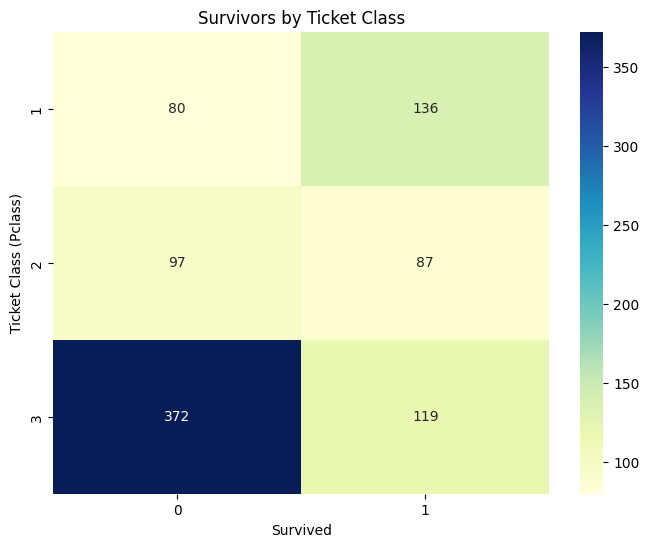

In [3]:
# Create a cross-tabulation (crosstab) of 'pclass' (ticket class) and 'survived'
cross_tab = pd.crosstab(df['pclass'], df['survived'])

# Plot the heatmap to visualize the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Ticket Class (Pclass)')
plt.title('Survivors by Ticket Class')
plt.show()


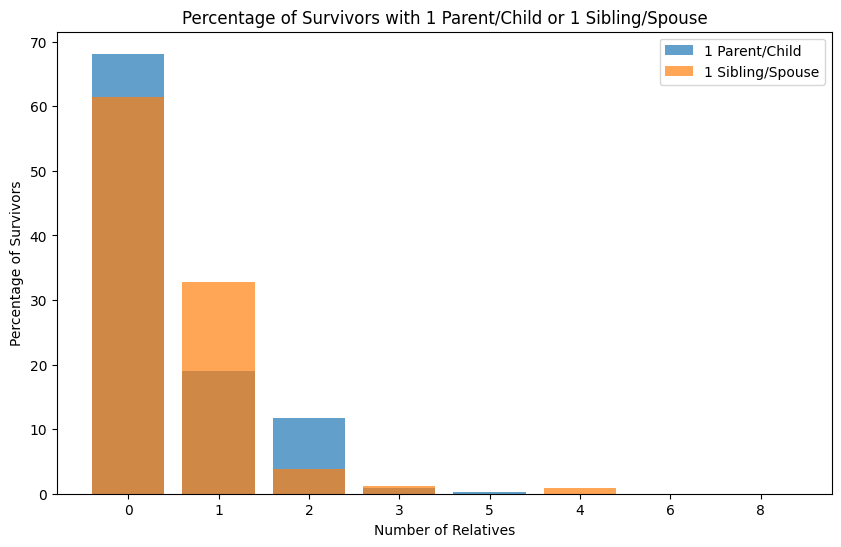

Percentage of survivors with 1 Parent/Child: 19.01%
Percentage of survivors with 1 Sibling/Spouse: 32.75%


In [5]:
# Convert 'parch' and 'sibsp' to category data type
df['parch'] = df['parch'].astype('category')
df['sibsp'] = df['sibsp'].astype('category')

survivors = df[df['survived'] == 1]

percentage_with_1_parch = (survivors['parch'].value_counts(normalize=True) * 100).round(2)

percentage_with_1_sibsp = (survivors['sibsp'].value_counts(normalize=True) * 100).round(2)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percentage_with_1_parch.index.astype(str), percentage_with_1_parch.values, label='1 Parent/Child', alpha=0.7)
plt.bar(percentage_with_1_sibsp.index.astype(str), percentage_with_1_sibsp.values, label='1 Sibling/Spouse', alpha=0.7)
plt.xlabel('Number of Relatives')
plt.ylabel('Percentage of Survivors')
plt.title('Percentage of Survivors with 1 Parent/Child or 1 Sibling/Spouse')
plt.legend()
plt.show()

# Print the calculated percentages
print(f'Percentage of survivors with 1 Parent/Child: {percentage_with_1_parch[1]}%')
print(f'Percentage of survivors with 1 Sibling/Spouse: {percentage_with_1_sibsp[1]}%')


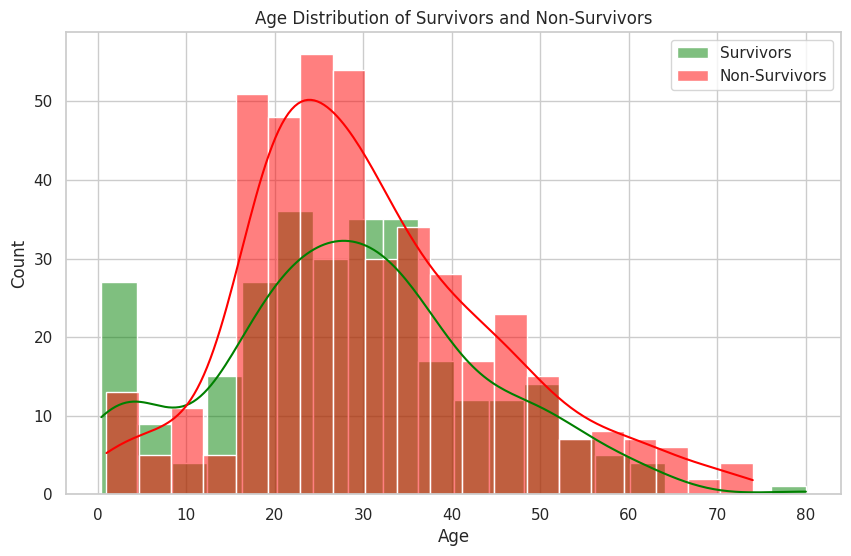

In [6]:
survivors = df[df['survived'] == 1]
non_survivors = df[df['survived'] == 0]

sns.set(style="whitegrid")

# Create histograms for the age distribution of survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(survivors['age'], bins=20, label='Survivors', color='green', kde=True)
sns.histplot(non_survivors['age'], bins=20, label='Non-Survivors', color='red', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.show()


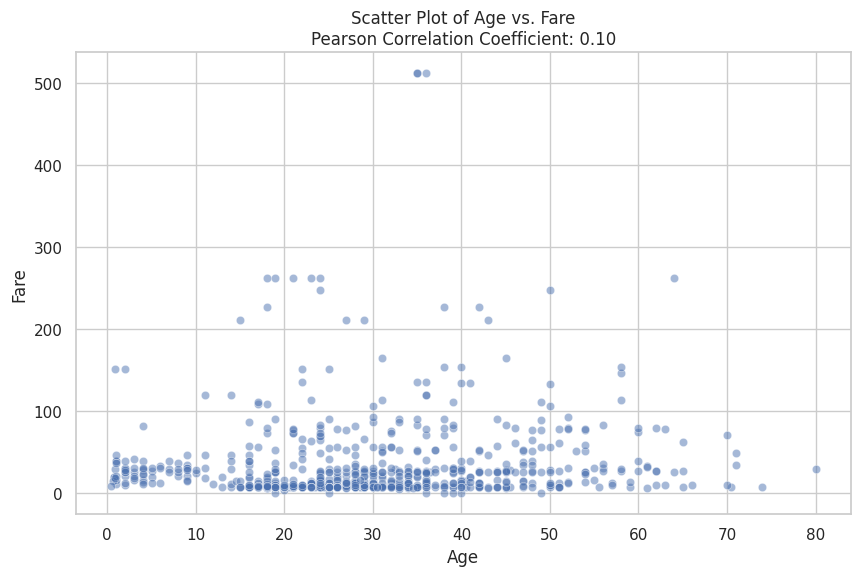

Pearson Correlation Coefficient: 0.10


In [7]:


df_cleaned = df.dropna(subset=['age', 'fare'])

correlation_coefficient = df_cleaned['age'].corr(df_cleaned['fare'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='age', y='fare', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title(f'Scatter Plot of Age vs. Fare\nPearson Correlation Coefficient: {correlation_coefficient:.2f}')
plt.show()

# Print the Pearson correlation coefficient
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')


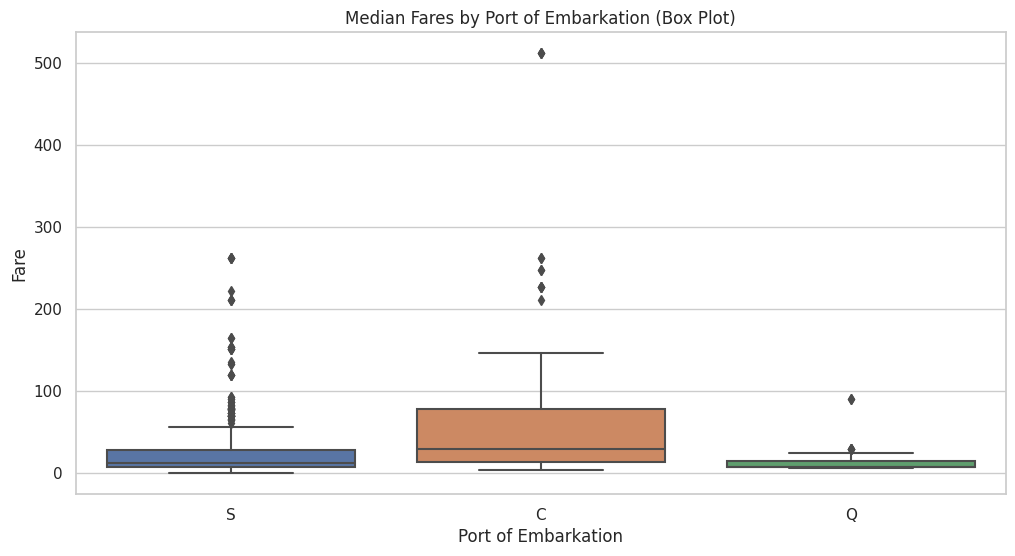

<Figure size 1200x600 with 0 Axes>

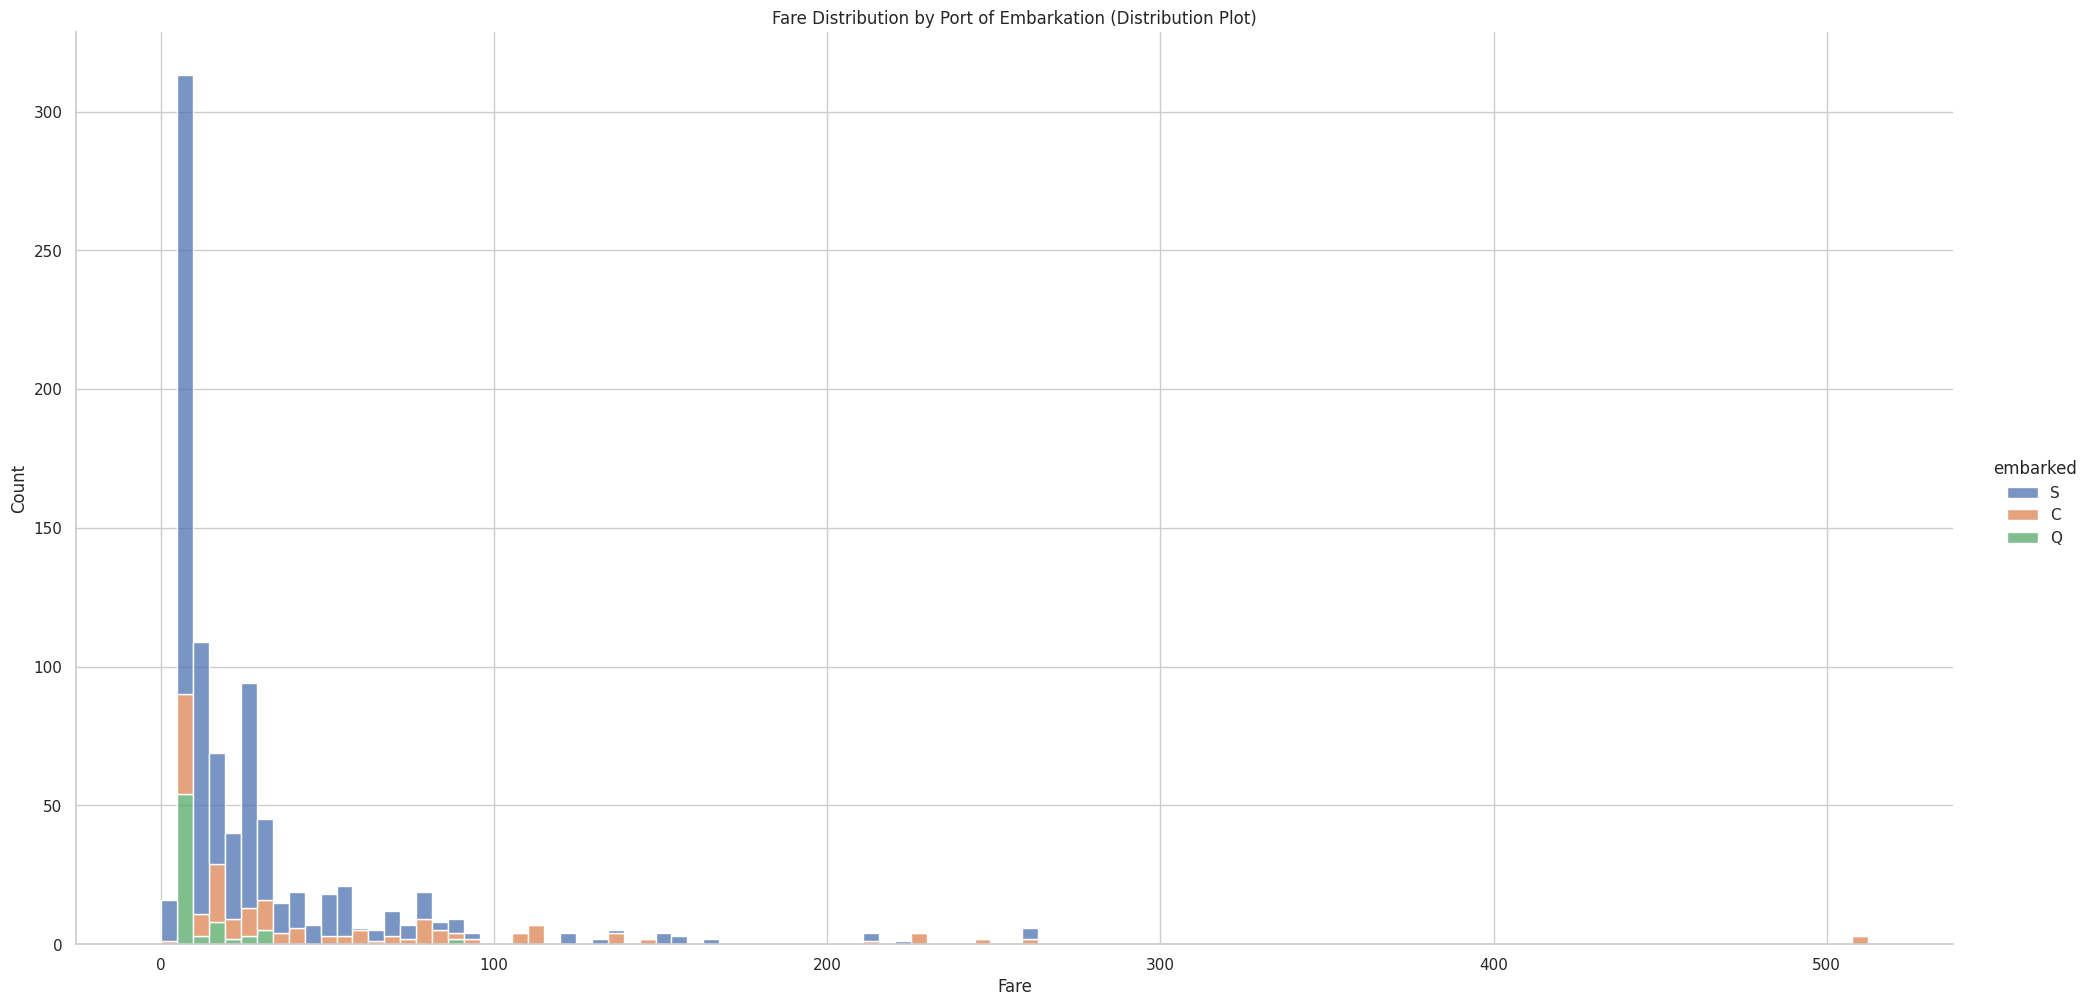

Port where people paid more than $500 in fare: C


In [8]:

df_cleaned = df.dropna(subset=['fare', 'embarked'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='embarked', y='fare')
plt.xlabel('Port of Embarkation')
plt.ylabel('Fare')
plt.title('Median Fares by Port of Embarkation (Box Plot)')
plt.show()

# Create a distribution plot to show fare distributions by port of embarkation
plt.figure(figsize=(12, 6))
sns.displot(data=df_cleaned, x='fare', hue='embarked', multiple='stack', height=10, aspect=2)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution by Port of Embarkation (Distribution Plot)')
plt.show()

# Identify the port where people paid more than 500 dollars in fare
high_fare_port = df_cleaned[df_cleaned['fare'] > 500]['embarked'].values[0]
print(f'Port where people paid more than $500 in fare: {high_fare_port}')
